Deep Belief Network (DBN) - Test 3

In [1]:
from torchvision import datasets, transforms
from torchvision.datasets import MNIST, FashionMNIST
from torch.utils.data import DataLoader

from DBN import DBN

import matplotlib.pyplot as plt
import torch
import pandas as pd
import torch.nn as nn

In [2]:
def greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 5):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(dbn_model.parameters(), lr=lr)

    details = []
    for epoch in range(epochs):
        dbn_model.train()

        total_loss = 0
        batches = 0
        for x, y in train_loader:
            x = x.view(x.size(0), -1)

            logits = dbn_model(x)
            loss = criterion(logits, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            batches += 1

        avg_loss = total_loss / batches


        dbn_model.eval()
        correct = 0
        total = 0
        test_batches = 0
        with torch.no_grad():
            for x, y in test_loader:
                x = x.view(x.size(0), -1)

                logits = dbn_model(x)
                preds = logits.argmax(dim = 1)

                correct += (preds == y).sum().item()
                total += y.size(0)

                test_batches += 1

        acc = correct/total

        details.append({'epoch': epoch + 1, 'train_loss': avg_loss, 'test_accuracy': acc})

        print(f"Epoch {epoch + 1}/{epochs} - train loss: {avg_loss:.4f} - test acc: {acc:.4f}")

    return dbn_model, pd.DataFrame(details)

DBN with ReLU and with Pre-training

In [3]:
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500], lr=0.05, cd_k=1, category='p')

training_details = model.pre_training(train_loader, epochs_per_layer=10)

lr = 1e-3

dbn_model = model.build_classifier(10)

dbn_model, complete_details = greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 15)

RBM 1 Training:
  Epoch 1/10 - loss: 0.3356
  Epoch 2/10 - loss: 0.3180
  Epoch 3/10 - loss: 0.3083
  Epoch 4/10 - loss: 0.3019
  Epoch 5/10 - loss: 0.2973
  Epoch 6/10 - loss: 0.2939
  Epoch 7/10 - loss: 0.2911
  Epoch 8/10 - loss: 0.2888
  Epoch 9/10 - loss: 0.2869
  Epoch 10/10 - loss: 0.2852
RBM 2 Training:
  Epoch 1/10 - loss: 0.4328
  Epoch 2/10 - loss: 0.4131
  Epoch 3/10 - loss: 0.4024
  Epoch 4/10 - loss: 0.3954
  Epoch 5/10 - loss: 0.3904
  Epoch 6/10 - loss: 0.3867
  Epoch 7/10 - loss: 0.3838
  Epoch 8/10 - loss: 0.3814
  Epoch 9/10 - loss: 0.3795
  Epoch 10/10 - loss: 0.3779
Epoch 1/15 - train loss: 0.6784 - test acc: 0.8500
Epoch 2/15 - train loss: 0.3599 - test acc: 0.8674
Epoch 3/15 - train loss: 0.3083 - test acc: 0.8713
Epoch 4/15 - train loss: 0.2789 - test acc: 0.8722
Epoch 5/15 - train loss: 0.2539 - test acc: 0.8859
Epoch 6/15 - train loss: 0.2329 - test acc: 0.8804
Epoch 7/15 - train loss: 0.2194 - test acc: 0.8874
Epoch 8/15 - train loss: 0.2017 - test acc: 0.887

DBN without ReLU and With Pre-Training

In [4]:
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500], lr=0.05, cd_k=1, category='p', relu=False)

training_details = model.pre_training(train_loader, epochs_per_layer=10)

lr = 1e-3

dbn_model = model.build_classifier(10)

dbn_model, without_relu_details = greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 15)

RBM 1 Training:
  Epoch 1/10 - loss: 0.3355
  Epoch 2/10 - loss: 0.3179
  Epoch 3/10 - loss: 0.3081
  Epoch 4/10 - loss: 0.3017
  Epoch 5/10 - loss: 0.2972
  Epoch 6/10 - loss: 0.2937
  Epoch 7/10 - loss: 0.2909
  Epoch 8/10 - loss: 0.2886
  Epoch 9/10 - loss: 0.2867
  Epoch 10/10 - loss: 0.2851
RBM 2 Training:
  Epoch 1/10 - loss: 0.4328
  Epoch 2/10 - loss: 0.4132
  Epoch 3/10 - loss: 0.4025
  Epoch 4/10 - loss: 0.3955
  Epoch 5/10 - loss: 0.3905
  Epoch 6/10 - loss: 0.3867
  Epoch 7/10 - loss: 0.3838
  Epoch 8/10 - loss: 0.3814
  Epoch 9/10 - loss: 0.3795
  Epoch 10/10 - loss: 0.3779
Epoch 1/15 - train loss: 3.1955 - test acc: 0.7743
Epoch 2/15 - train loss: 1.0254 - test acc: 0.7709
Epoch 3/15 - train loss: 0.7844 - test acc: 0.8092
Epoch 4/15 - train loss: 0.6988 - test acc: 0.7559
Epoch 5/15 - train loss: 0.6624 - test acc: 0.8113
Epoch 6/15 - train loss: 0.6205 - test acc: 0.8153
Epoch 7/15 - train loss: 0.5706 - test acc: 0.8149
Epoch 8/15 - train loss: 0.5519 - test acc: 0.810

DBN without ReLU and without Pre-Training

In [5]:
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root="./data", train=True, transform=transform, download=True)
test_dataset  = datasets.FashionMNIST(root="./data", train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,  drop_last=True)
test_loader  = DataLoader(test_dataset,  batch_size=512, shuffle=False)

model = DBN(layers=[28*28, 500, 500], lr=0.05, cd_k=1, category='p', relu=False)

lr = 1e-3

dbn_model = model.build_classifier(10)

dbn_model, without_relu_pretrain_details = greedy_layer_wise_training(dbn_model, train_loader, test_loader, lr, epochs = 15)

Epoch 1/15 - train loss: 0.5656 - test acc: 0.8237
Epoch 2/15 - train loss: 0.4689 - test acc: 0.8367
Epoch 3/15 - train loss: 0.4488 - test acc: 0.8252
Epoch 4/15 - train loss: 0.4388 - test acc: 0.8131
Epoch 5/15 - train loss: 0.4359 - test acc: 0.8293
Epoch 6/15 - train loss: 0.4300 - test acc: 0.8256
Epoch 7/15 - train loss: 0.4225 - test acc: 0.8388
Epoch 8/15 - train loss: 0.4190 - test acc: 0.8348
Epoch 9/15 - train loss: 0.4166 - test acc: 0.8347
Epoch 10/15 - train loss: 0.4171 - test acc: 0.8359
Epoch 11/15 - train loss: 0.4119 - test acc: 0.8379
Epoch 12/15 - train loss: 0.4057 - test acc: 0.8376
Epoch 13/15 - train loss: 0.4073 - test acc: 0.8347
Epoch 14/15 - train loss: 0.4030 - test acc: 0.8386
Epoch 15/15 - train loss: 0.4034 - test acc: 0.8346


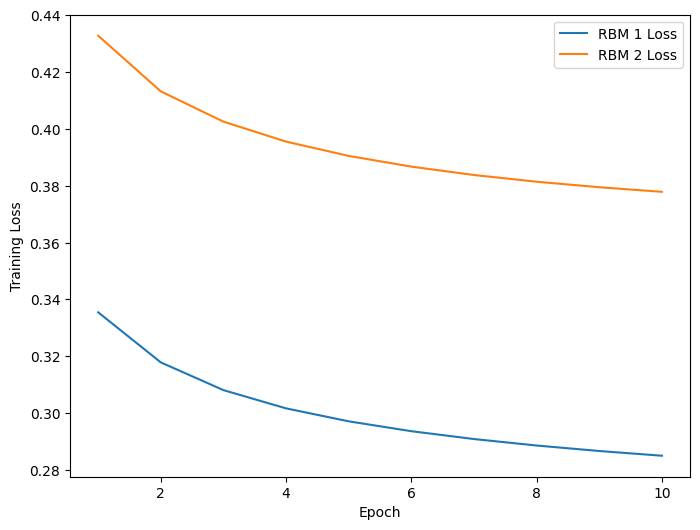

In [8]:
plt.figure(figsize=(8, 6))
for l_rbm in training_details['rbm'].drop_duplicates().tolist():
    plt.plot(training_details[training_details['rbm'] == l_rbm]['epoch'], training_details[training_details['rbm'] == l_rbm]['loss'], label=f'RBM {l_rbm + 1} Loss')
plt.ylabel('Training Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

Text(0.5, 0, 'Epoch')

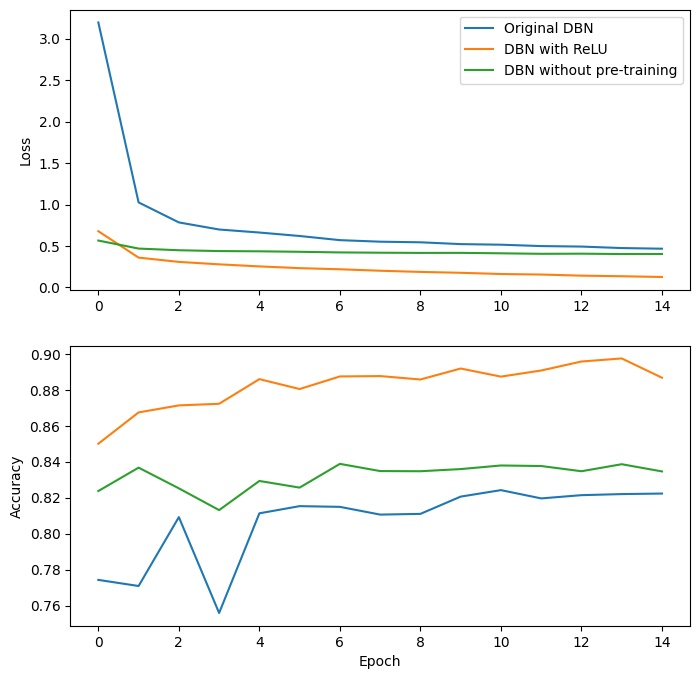

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))

axes[0].plot(without_relu_details['train_loss'], label=f'Original DBN')
axes[0].plot(complete_details['train_loss'], label=f'DBN with ReLU')
axes[0].plot(without_relu_pretrain_details['train_loss'], label=f'DBN without pre-training')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(without_relu_details['test_accuracy'], label=f'Accuracy')
axes[1].plot(complete_details['test_accuracy'], label=f'Accuracy')
axes[1].plot(without_relu_pretrain_details['test_accuracy'], label=f'Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')